In [37]:
import pandas as pd
import concurrent.futures
import urllib.request
from bs4 import BeautifulSoup
from datetime import datetime
import requests
import glob
import pickle
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
score_url_dates = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
urls = []
for dat in score_url_dates:
    date = f'https://www.hockey-reference.com/leagues/NHL_{dat}_games.html'
    urls.append(date)
result_dfs = []
for url in urls:
    page = pd.read_html(url)
    results_dfs.append(page[0])
result_df = pd.concat([result_dfs[i] for i in range(len(dfs))])

In [3]:
result_df.columns = ['Date','Away','VG','Home','HG','OT','ATT','LOG','Notes']
results_df = result_df[['Date','Away','VG','Home','HG','OT','ATT']]

In [4]:
odds_date_list = []
for df in results_dfs:
    dates = list(df['Date'].unique())
    for date in dates:
        odds_date_list.append(date)

In [5]:
odds_dict = {}
for date in odds_date_list:
    broken = date.replace('-','')
    url = f'https://www.sportsbookreview.com/betting-odds/nhl-hockey/?date={broken}'
    odds_dict[date] = url

In [6]:
odds_urls = []
for k,v in odds_dict.items():
    odds_urls.append(v)
# len(odds_urls)

In [8]:
existing_filed = [x for x in glob.glob('htmlFolder/*.html')]
def load_html(url):
    fullname = "htmlFolder\ "+ url.split('=')[1] + ".html"
    if fullname not in existing_filed:
        resp = requests.get(url)
        soup = BeautifulSoup(resp.text,"html.parser")
#         fullname = "htmlFolder\ "+ url.split('=')[1] + ".html"
        with open(fullname, 'w', encoding="utf-8") as f:
            f.write(str(soup))

with concurrent.futures.ThreadPoolExecutor(max_workers=6) as executor:
    # Start the load operations and mark each future with its URL
    future_to_url = {executor.submit(load_html, url): url for url in oddss_urls}
    for future in concurrent.futures.as_completed(future_to_url):
        url = future_to_url[future]
        try:
            data = future.result()
        except Exception as exc:  'a'
#             print('%r generated an exception: %s' % (url, exc))
        else:  'b'
        
for url in odds_urls:
    load_html(url)

In [9]:
existing_files = [x for x in glob.glob('htmlFolder/*.html')]
info_list= []
game_odds_dict = {}
allGames = []
count = 0
for file in existing_files:
    date_pre = file.split('\\')[1].split('.')[0].split(' ')[1]
    date = date_pre[:4] + '-' + date_pre[4:6] + '-' + date_pre[6:]
    if date not in games_odds_dict.keys():
        games_odds_dict[date] = []
    with open(file, 'r', encoding='utf-8') as f:
        soup = BeautifulSoup(f, "html.parser")
        soup_1 = soup.find_all('span',{'class':'opener'})
        soup_2 = soup.find_all('span')
#     resp = requests.get(file)
#     soup = BeautifulSoup(resp.text,"html.parser")
#     idk = soup.find_all('span',{'class':'opener'})
        soup_1x = [str(i) for i in soup_1]
        soup_1x = [i for i in soup1_x if i!='<span class="opener">-</span>']
        c = 0
        home=[]
        #     final = []
        for i in soup_1x:
            val = i.split(">")[1].split("<")[0]
            if '%' not in val:
                home.append(val)
    #         l.append(val)
    #     print(l)
    #     idx = soup.find_all('span')
        soup_2x = [str(i) for i in soup_2x if 'class="_3O1Gx"' in str(i)]
        away = []
        for ik in soup_2x:
            vals = ik.split('>')[1].split('<')[0]
            away.append(vals)
    #     print(j)
        combined_info = list(zip(home,away))
        mess_info = []
        for info in combined_info:
            info_list.append(info)
            c+=1
            if c%2==0:
                mess.append(info_list)
                info_list = []
        bigger_dict = []
        for info in mess:
            away = info[0][0]
            home = info[1][0]
            h_odd = info[1][1]
            a_odd = info[0][1]
            small_dict = {'Home':home,'Away':away,'H_odd':h_odd,"A_odd":a_odd}
            tempDict = small_dict.copy()
            tempDict["Date"]= date
            allGames.append(tempDict)
            bigger_dict.append(small_dict)
        game_odds_dict[date].extend(bigger_dict)
        pop = {date:bigger_dict}
        game_odds_dict[date] = bigger_dict
        count +=1
#         print(count)
# len(allGames)

11844

In [10]:
odds_df = pd.DataFrame(allGames)
odds_df.shape

(11844, 5)

In [22]:
odds_df["Home"] = odds_df["Home"].apply(lambda x: "Detroit" if x=="Unknown" else x)
odds_df["Away"] = odds_df["Away"].apply(lambda x: "Toronto" if x=="Unknown" else x)
odds_df[odds_df['Away']=='Unknown'],odds_df[odds_df['Home']=='Unknown']

(Empty DataFrame
 Columns: [A_odd, Away, Date, H_odd, Home]
 Index: [], Empty DataFrame
 Columns: [A_odd, Away, Date, H_odd, Home]
 Index: [])

In [12]:
team_names = list(results_df['Away'].unique())
city_names = list(odds_df['Away'].unique())

In [23]:
city_to_team_dict = {}
city_to_team_dict['Anaheim'] = 'Anaheim Ducks'
city_to_team_dict['Arizona'] = 'Arizona Coyotes'
city_to_team_dict['Boston'] = 'Boston Bruins'
city_to_team_dict['Buffalo'] = 'Buffalo Sabres'
city_to_team_dict['Calgary'] = 'Calgary Flames'
city_to_team_dict['Carolina'] = 'Carolina Hurricanes'
city_to_team_dict['Chicago'] = 'Chicago Blackhawks'
city_to_team_dict['Colorado'] = 'Colorado Avalanche'
city_to_team_dict['Columbus'] = 'Columbus Blue Jackets'
city_to_team_dict['Dallas'] = 'Dallas Stars'
city_to_team_dict['Detroit'] = 'Detroit Red Wings'
city_to_team_dict['Edmonton'] = 'Edmonton Oilers'
city_to_team_dict['Florida'] = 'Florida Panthers'
city_to_team_dict['Los Angeles'] = 'Los Angeles Kings'
city_to_team_dict['Minnesota'] = 'Minnesota Wild'
city_to_team_dict['Montreal'] = 'Montreal Canadiens'
city_to_team_dict['N.Y. Islanders'] = 'New York Islanders'
city_to_team_dict['N.Y. Rangers'] = 'New York Rangers'
city_to_team_dict['Nashville'] = 'Nashville Predators'
city_to_team_dict['New Jersey'] = 'New Jersey Devils'
city_to_team_dict['Ottawa'] = 'Ottawa Senators'
city_to_team_dict['Philadelphia'] = 'Philadelphia Flyers'
city_to_team_dict['Pittsburgh'] = 'Pittsburgh Penguins'
city_to_team_dict['San Jose'] = 'San Jose Sharks'
city_to_team_dict['St. Louis'] = 'St. Louis Blues'
city_to_team_dict['Tampa Bay'] = 'Tampa Bay Lightning'
city_to_team_dict['Toronto'] = 'Toronto Maple Leafs'
city_to_team_dict['Vancouver'] = 'Vancouver Canucks'
city_to_team_dict['Vegas'] = 'Vegas Golden Knights'
city_to_team_dict['Washington'] = 'Washington Capitals'
city_to_team_dict['Winnipeg'] = 'Winnipeg Jets'

In [21]:
rename_dict = {}
rename_dict['Anaheim Ducks'] = 'Anaheim Ducks'
rename_dict['Arizona Coyotes'] = 'Arizona Coyotes'
rename_dict['Atlanta Thrashers'] = 'Winnipeg Jets'
rename_dict['Boston Bruins'] = 'Boston Bruins'
rename_dict['Buffalo Sabres'] = 'Buffalo Sabres'
rename_dict['Calgary Flames'] = 'Calgary Flames'
rename_dict['Carolina Hurricanes'] = 'Carolina Hurricanes'
rename_dict['Chicago Blackhawks'] = 'Chicago Blackhawks'
rename_dict['Colorado Avalanche'] = 'Colorado Avalanche'
rename_dict['Columbus Blue Jackets'] = 'Columbus Blue Jackets'
rename_dict['Dallas Stars'] = 'Dallas Stars'
rename_dict['Detroit Red Wings'] = 'Detroit Red Wings'
rename_dict['Edmonton Oilers'] = 'Edmonton Oilers'
rename_dict['Florida Panthers'] = 'Florida Panthers'
rename_dict['Los Angeles Kings'] = 'Los Angeles Kings'
rename_dict['Minnesota Wild'] = 'Minnesota Wild'
rename_dict['Montreal Canadiens'] = 'Montreal Canadiens'
rename_dict['Nashville Predators'] = 'Nashville Predators'
rename_dict['New York Rangers'] = 'New York Rangers'
rename_dict['New York Islanders'] = 'New York Islanders'
rename_dict['Ottawa Senators'] = 'Ottawa Senators'
rename_dict['Philadelphia Flyers'] = 'Philadelphia Flyers'
rename_dict['Phoenix Coyotes'] = 'Arizona Coyotes'
rename_dict['Pittsburgh Penguins'] = 'Pittsburgh Penguins'
rename_dict['San Jose Sharks'] = 'San Jose Sharks'
rename_dict['St. Louis Blues'] = 'St. Louis Blues'
rename_dict['Tampa Bay Lightning'] = 'Tampa Bay Lightning'
rename_dict['Toronto Maple Leafs'] = 'Toronto Maple Leafs'
rename_dict['Vancouver Canucks'] = 'Vancouver Canucks'
rename_dict['Vegas Golden Knights'] = 'Vegas Golden Knights'
rename_dict['Washington Capitals'] = 'Washington Capitals'
rename_dict['Winnipeg Jets'] = 'Winnipeg Jets'
rename_dict['New Jersey Devils'] = 'New Jersey Devils'
set(list(city_to_team_dict.values())) == set(list(rename_dict.values())) 

True

In [35]:
ML_dict = {}
ML_dict['Anaheim Ducks'] = 1
ML_dict['Arizona Coyotes'] = 2
ML_dict['Boston Bruins'] = 3
ML_dict['Buffalo Sabres'] = 4
ML_dict['Calgary Flames'] = 5
ML_dict['Carolina Hurricanes'] = 6
ML_dict['Chicago Blackhawks'] = 7
ML_dict['Colorado Avalanche'] = 8
ML_dict['Columbus Blue Jackets'] = 9
ML_dict['Dallas Stars'] = 10
ML_dict['Detroit Red Wings'] = 11
ML_dict['Edmonton Oilers'] = 12
ML_dict['Florida Panthers'] = 13
ML_dict['Los Angeles Kings'] = 14
ML_dict['Minnesota Wild'] = 15
ML_dict['Montreal Canadiens'] = 16
ML_dict['Nashville Predators'] = 17
ML_dict['New Jersey Devils'] = 18
ML_dict['New York Rangers'] = 19
ML_dict['New York Islanders'] = 20
ML_dict['Ottawa Senators'] = 21
ML_dict['Philadelphia Flyers'] = 22
ML_dict['Pittsburgh Penguins'] = 23
ML_dict['San Jose Sharks'] = 24
ML_dict['St. Louis Blues'] = 25
ML_dict['Tampa Bay Lightning'] = 26
ML_dict['Toronto Maple Leafs'] = 27
ML_dict['Vancouver Canucks'] = 28
ML_dict['Vegas Golden Knights'] = 29
ML_dict['Washington Capitals'] = 30
ML_dict['Winnipeg Jets'] = 31
num_to_team = {v:k for k,v in ML_dict.items()}

In [26]:
odds_df["Home"] = odds_df["Home"].apply(lambda x: city_to_team_dict[x])
odds_df["Away"] = odds_df["Away"].apply(lambda x: city_to_team_dict[x])
# odds_df.head()

,A_odd,Away,Date,H_odd,Home
0,+110,Montreal Canadiens,2009-10-01,-130,Toronto Maple Leafs
1,+115,Washington Capitals,2009-10-01,-135,Boston Bruins
2,-175,San Jose Sharks,2009-10-01,+155,Colorado Avalanche
3,+115,Vancouver Canucks,2009-10-01,-135,Calgary Flames
4,+140,Florida Panthers,2009-10-02,-160,Chicago Blackhawks


In [27]:
odds_sorted = odds_df.sort_values(by=['Date','Home','Away'])
results_sorted = results_df.sort_values(by=['Date','Home','Away'])

In [29]:
odds_and_results_df = odds_sorted.merge(results_sorted, left_on=['Date','Home'], right_on=['Date','Home'], how='inner')

endings = []
for row in odds_and_results_df.iterrows():
    if row[1][8] == 'OT':
        endings.append('OT')
    elif row[1][8] == 'SO':
        endings.append('SO')
    else: endings.append('REG')
odds_and_results_df['OT'] = endings
odds_and_results_df['Winner'] = odds_and_results_df['HG'] - odds_and_results_df['VG']
odds_and_results_df['Away_y'] = odds_and_results_df['Away_y'].apply(lambda x: rename_dict[x])
odds_and_results_df = odds_and_results_df.dropna()
odds_and_results_df.shape
winning_team = []
for row in odds_and_results_df.iterrows():
    if row[1][10] < 0: 
        winning_team.append(row[1][5])
    elif row[1][10] > 0: 
        winning_team.append(row[1][4])
    else:
        print(row)
odds_and_results_df['Winner'] = winning_team
# odds_and_results_df.head()

,A_odd,Away_x,Date,H_odd,Home,Away_y,VG,HG,OT,ATT,Winner
0,+115,Washington Capitals,2009-10-01,-135,Boston Bruins,Washington Capitals,4.0,1.0,REG,17565.0,Washington Capitals
1,+115,Vancouver Canucks,2009-10-01,-135,Calgary Flames,Vancouver Canucks,3.0,5.0,REG,19289.0,Calgary Flames
2,-175,San Jose Sharks,2009-10-01,+155,Colorado Avalanche,San Jose Sharks,2.0,5.0,REG,18007.0,Colorado Avalanche
3,+110,Montreal Canadiens,2009-10-01,-130,Toronto Maple Leafs,Montreal Canadiens,4.0,3.0,OT,19617.0,Montreal Canadiens
4,+100,Philadelphia Flyers,2009-10-02,-120,Carolina Hurricanes,Philadelphia Flyers,2.0,0.0,REG,18680.0,Philadelphia Flyers


In [30]:
odds_and_results_df = odds_and_results_df[['Date','Home','H_odd','Away_y','A_odd','HG','VG','OT','ATT','Winner']]
odds_and_results_df.columns = ['Date','Home','Home_line','Away','Away_line','H_Goals','A_Goals','End','ATT','Winner']
odds_and_results_df['Home_line'] = odds_and_results_df['Home_line'].apply(lambda x: int(x))
odds_and_results_df['Away_line'] = odds_and_results_df['Away_line'].apply(lambda x: int(x))
# odds_and_results_df.head()

,Date,Home,Home_line,Away,Away_line,H_Goals,A_Goals,End,ATT,Winner
0,2009-10-01,Boston Bruins,-135,Washington Capitals,115,1.0,4.0,REG,17565.0,Washington Capitals
1,2009-10-01,Calgary Flames,-135,Vancouver Canucks,115,5.0,3.0,REG,19289.0,Calgary Flames
2,2009-10-01,Colorado Avalanche,155,San Jose Sharks,-175,5.0,2.0,REG,18007.0,Colorado Avalanche
3,2009-10-01,Toronto Maple Leafs,-130,Montreal Canadiens,110,3.0,4.0,OT,19617.0,Montreal Canadiens
4,2009-10-02,Carolina Hurricanes,-120,Philadelphia Flyers,100,0.0,2.0,REG,18680.0,Philadelphia Flyers


In [31]:
home_returns = []
away_returns = []
count = 0
for row in odds_and_results_df.iterrows():
    if row[1][9] == row[1][1]:
        away_loss = 10
        away_returns.append(- away_loss)
        if row[1][2] > 0:
            wins = row[1][2]/10
            home_returns.append(round(wins,1))
        elif row[1][2] < 0:
            mult = (100/-(row[1][2]))
            wins = mult*10
            home_returns.append(round(wins,1))
            
    elif row[1][9] == row[1][3]:
        home_loss = -10
        home_returns.append(home_loss)
        if row[1][4] > 0:
            wins = row[1][4]/10
            away_returns.append(round(wins,1))
        elif row[1][4] < 0:
            mult = (100/-(row[1][4]))
            wins = mult*10
            away_returns.append(round(wins,1))
    else: print(row[1])
            

# len(away_returns), len(home_returns), odds_and_results_df.shape

(11556, 11556, (11556, 10))

In [33]:
odds_and_results_df['H_returns'] = home_returns
odds_and_results_df['A_returns'] = away_returns
odds_and_results_df['H_returns'] = odds_and_results_df['H_returns'].apply(lambda x: float(x))
odds_and_results_df['A_returns'] =odds_and_results_df['A_returns'].apply(lambda x: float(x))
# odds_and_results_df.head()

,Date,Home,Home_line,Away,Away_line,H_Goals,A_Goals,End,ATT,Winner,H_returns,A_returns
0,2009-10-01,Boston Bruins,-135,Washington Capitals,115,1.0,4.0,REG,17565.0,Washington Capitals,-10.0,11.5
1,2009-10-01,Calgary Flames,-135,Vancouver Canucks,115,5.0,3.0,REG,19289.0,Calgary Flames,7.4,-10.0
2,2009-10-01,Colorado Avalanche,155,San Jose Sharks,-175,5.0,2.0,REG,18007.0,Colorado Avalanche,15.5,-10.0
3,2009-10-01,Toronto Maple Leafs,-130,Montreal Canadiens,110,3.0,4.0,OT,19617.0,Montreal Canadiens,-10.0,11.0
4,2009-10-02,Carolina Hurricanes,-120,Philadelphia Flyers,100,0.0,2.0,REG,18680.0,Philadelphia Flyers,-10.0,10.0


In [44]:
ml_df = odds_and_results_df[['Date','Home','Home_line','Away','Away_line','H_Goals','A_Goals','Winner']]
ml_df['Home']= ml_df['Home'].apply(lambda x: ML_dict[x])
ml_df['Away']= ml_df['Away'].apply(lambda x: ML_dict[x])
ml_df['Winner']= ml_df['Winner'].apply(lambda x: ML_dict[x])
ml_df['Date'] = ml_df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
ml_df['Date_month'] = ml_df['Date'].apply(lambda x: x.month)
ml_df['Date_day'] = ml_df['Date'].apply(lambda x: x.day)
ml_df['Date_year'] = ml_df['Date'].apply(lambda x: x.year)
ml_df['Date_DOW'] = ml_df['Date'].apply(lambda x: x.weekday())
ml_df['Winner_score'] = ml_df['H_Goals'] - ml_df['A_Goals']
# ml_df.head()

C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [45]:
home_win = []
for row in ml_df.iterrows():
    if row[1][-1] > 0:
        result = 1
        home_win.append(1)
    elif row[1][-1] < 0:
        results = 0
        home_win.append(results)
    else: print(row[1][-1])
ml_df['Home_win'] = home_win

line_spreads = []
for row in ml_df.iterrows():
    if row[1][2] < 0:
        home_line = -(row[1][2])
    else: home_line = row[1][2]
    if row[1][4] < 0:
        away_line = -(row[1][4])
    else: away_line = row[1][4]
    line_spread = home_line + away_line
    line_spreads.append(line_spread)
len(line_spreads)
ml_df['line_spread'] = line_spreads
ml_df.head()

,Date,Home,Home_line,Away,Away_line,H_Goals,A_Goals,Winner,Date_month,Date_day,Date_year,Date_DOW,Winner_score,Home_win,line_spread
0,2009-10-01,3,-135,30,115,1.0,4.0,30,10,1,2009,3,-3.0,0,250
1,2009-10-01,5,-135,28,115,5.0,3.0,5,10,1,2009,3,2.0,1,250
2,2009-10-01,8,155,24,-175,5.0,2.0,8,10,1,2009,3,3.0,1,330
3,2009-10-01,27,-130,16,110,3.0,4.0,16,10,1,2009,3,-1.0,0,240
4,2009-10-02,6,-120,22,100,0.0,2.0,22,10,2,2009,4,-2.0,0,220


In [46]:
X = ml_df[['Date_month','Date_year','Date_day','Home','Home_line','Away','Away_line']]
y = ml_df[['Home_win']]

In [47]:
def all_season_results(year):
    X_tester7 = X[(X.Date_year == year)&(X.Date_month < 6)]
    y_tester7 = ml_df[(ml_df.Date_year == year)&(ml_df.Date_month < 6)]
    y_tester7 = y_tester7[['Home_win']]
    X_tester8 = X[(X.Date_year == (year -1)) & (X.Date_month > 6)]
    y_tester8 = ml_df[(ml_df.Date_year == (year -1)) & (ml_df.Date_month > 6)]
    y_tester8 = y_tester8[['Home_win']]
    X_tester9 = pd.concat([X_tester7,X_tester8])
    y_tester9 = pd.concat([y_tester7,y_tester8])

    test_df = pd.concat([X_tester9,y_tester9], axis = 1)

    def season_results(team):
        season_total = 0
        home_df = test_df[(test_df.Home == team)]
        away_df = test_df[(test_df.Away == team)]
        home_away_df  = pd.concat([home_df,away_df])
        for row in home_away_df.iterrows():
            if row[1][7] == 1:
                if row[1][3] == team:
                    if row[1][4] > 0:
                        winning = row[1][4]*10
                    else: 
                        mult = 100/(-row[1][4])
                        winning = mult*1000
                    season_total += winning
                else:
                    loss = -1000
                    season_total += loss
            else:
                if row[1][5] == team:
                    if row[1][6] > 0:
                        winning = row[1][6]*10
                    else: 
                        mult = 100/(-row[1][6])
                        winning = mult*1000
                    season_total += winning
                else:
                    loss = -1000
                    season_total += loss
        return[num_to_team[team],season_total]
    dictionary_name = f"results_{year}"
    dictionary_name = {}
    return_list=[]
    for num in range(1,32):
        team,season_total = season_results(num)
        dictionary_name[team] = season_total
#         return_list.append(dictionary_name)
    return(dictionary_name)

season_years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
all_season_results_dict = {}
for year in season_years:
    results = all_season_results(year)
    all_season_results_dict[year]=results

# all_season_results_dict

In [50]:
all_season_results_df = pd.DataFrame.from_records(all_season_results_dict)
all_season_results_df=all_season_results_df.reset_index()
all_season_results_df.columns = ['Team','2010_results','2011_results','2012_results','2013_results','2014_results','2015_results','2016_results','2017_results','2018_results','2019_results']
all_season_results_df['sum'] = (all_season_results_df['2010_results']+all_season_results_df['2011_results']+all_season_results_df['2012_results']+all_season_results_df['2013_results']+all_season_results_df['2014_results']+all_season_results_df['2015_results']+all_season_results_df['2016_results']+all_season_results_df['2017_results']+all_season_results_df['2018_results']+all_season_results_df['2019_results'])

# all_season_results_df

In [55]:
all_standings=[]
for num in range(2010,2020):
    standings_df_2010 = pd.read_html(f'https://www.hockey-reference.com/leagues/NHL_{num}_standings.html')[2]
    all_standings.append(standings_df_2010)
    
all_standings_dict = {}
for num in range(0,10):
    all_standings_dict[num] = all_standings[num][['Rk','Unnamed: 1']].T.to_dict()
all_standings_dict

{0: {0: {'Rk': 1, 'Unnamed: 1': 'Washington Capitals'},
  1: {'Rk': 2, 'Unnamed: 1': 'San Jose Sharks'},
  2: {'Rk': 3, 'Unnamed: 1': 'Chicago Blackhawks'},
  3: {'Rk': 4, 'Unnamed: 1': 'Phoenix Coyotes'},
  4: {'Rk': 5, 'Unnamed: 1': 'Vancouver Canucks'},
  5: {'Rk': 6, 'Unnamed: 1': 'New Jersey Devils'},
  6: {'Rk': 7, 'Unnamed: 1': 'Detroit Red Wings'},
  7: {'Rk': 8, 'Unnamed: 1': 'Pittsburgh Penguins'},
  8: {'Rk': 9, 'Unnamed: 1': 'Los Angeles Kings'},
  9: {'Rk': 10, 'Unnamed: 1': 'Nashville Predators'},
  10: {'Rk': 11, 'Unnamed: 1': 'Buffalo Sabres'},
  11: {'Rk': 12, 'Unnamed: 1': 'Colorado Avalanche'},
  12: {'Rk': 13, 'Unnamed: 1': 'Ottawa Senators'},
  13: {'Rk': 14, 'Unnamed: 1': 'Boston Bruins'},
  14: {'Rk': 15, 'Unnamed: 1': 'Calgary Flames'},
  15: {'Rk': 16, 'Unnamed: 1': 'St. Louis Blues'},
  16: {'Rk': 17, 'Unnamed: 1': 'Anaheim Ducks'},
  17: {'Rk': 18, 'Unnamed: 1': 'Philadelphia Flyers'},
  18: {'Rk': 19, 'Unnamed: 1': 'Montreal Canadiens'},
  19: {'Rk': 20, 'Un

In [100]:
results_and_standing_dict = all_season_results_df[['Team','2010_results','2011_results','2012_results','2013_results','2014_results','2015_results','2016_results','2017_results','2018_results','2019_results']].set_index('Team').T.to_dict('dict')

In [101]:
# results_and_standing_dict
for team,v in results_and_standing_dict.items():
    for year,h in v.items():
        year_split = (year.split('_')[0].split('01')[1])
        for d,f in all_standings_dict.items():
            if int(year_split) == d:
                for s,r in f.items():
                    rank = f[s]['Rk']
                    if f[s]['Unnamed: 1'] == team:
                        v[year] = [v[year],rank]
                    elif f[s]['Unnamed: 1'] == 'Phoenix Coyotes':
                        if team == 'Arizona Coyotes':
                            v[year] = [v[year],rank]
                    elif f[s]['Unnamed: 1'] == 'Atlanta Thrashers':
                        if team == 'Winnipeg Jets':
                            v[year] = [v[year],rank]

                    
results_and_standing_dict['Winnipeg Jets']

{'2010_results': [-3388.5281385281387, 23],
 '2011_results': [-116.1490683229813, 25],
 '2012_results': [-4204.3100307379445, 22],
 '2013_results': [-727.1318167950259, 18],
 '2014_results': [-5105.428066787095, 23],
 '2015_results': [5016.583142548747, 14],
 '2016_results': [-9632.531338788735, 25],
 '2017_results': [-1123.45992504913, 20],
 '2018_results': [10361.675230835548, 2],
 '2019_results': [-2108.2070923566835, 10]}

In [84]:
list_of_2010 = []
list_of_2011 = []
list_of_2012 = []
list_of_2013 = []
list_of_2014 = []
list_of_2015 = []
list_of_2016 = []
list_of_2017 = []
list_of_2018 = []
list_of_2019 = []
for row in all_season_results_df.iterrows():
    list_of_2010.append(row[1][1])
    list_of_2011.append(row[1][2])
    list_of_2012.append(row[1][3])
    list_of_2013.append(row[1][4])
    list_of_2014.append(row[1][5])
    list_of_2015.append(row[1][6])
    list_of_2016.append(row[1][7])
    list_of_2017.append(row[1][8])
    list_of_2018.append(row[1][9])
    list_of_2019.append(row[1][10])
    
list_of_2010.sort(reverse=True)
list_of_2011.sort(reverse=True)
list_of_2012.sort(reverse=True)
list_of_2013.sort(reverse=True)
list_of_2014.sort(reverse=True)
list_of_2015.sort(reverse=True)
list_of_2016.sort(reverse=True)
list_of_2017.sort(reverse=True)
list_of_2018.sort(reverse=True)
list_of_2019.sort(reverse=True)

In [102]:
for k,v in results_and_standing_dict.items():
    for g,h in v.items():
        if g == '2010_results':
            if type(h) == list:
                for t,y in enumerate(list_of_2010):
                    if h[0] == y:
                        v[g] = {'result':h[0],'standings':h[1],'result_rank':t+1}
        if g == '2011_results':
            if type(h) == list:
                for t,y in enumerate(list_of_2011):
                    if h[0] == y:
                        v[g] = {'result':h[0],'standings':h[1],'result_rank':t+1}
        if g == '2012_results':
            if type(h) == list:
                for t,y in enumerate(list_of_2012):
                    if h[0] == y:
                        v[g] = {'result':h[0],'standings':h[1],'result_rank':t+1}
        if g == '2013_results':
            if type(h) == list:
                for t,y in enumerate(list_of_2013):
                    if h[0] == y:
                        v[g] = {'result':h[0],'standings':h[1],'result_rank':t+1}
        if g == '2014_results':
            if type(h) == list:
                for t,y in enumerate(list_of_2014):
                    if h[0] == y:
                        v[g] = {'result':h[0],'standings':h[1],'result_rank':t+1}
        if g == '2015_results':
            if type(h) == list:
                for t,y in enumerate(list_of_2015):
                    if h[0] == y:
                        v[g] = {'result':h[0],'standings':h[1],'result_rank':t+1}
        if g == '2016_results':
            if type(h) == list:
                for t,y in enumerate(list_of_2016):
                    if h[0] == y:
                        v[g] = {'result':h[0],'standings':h[1],'result_rank':t+1}
        if g == '2017_results':
            if type(h) == list:
                for t,y in enumerate(list_of_2017):
                    if h[0] == y:
                        v[g] = {'result':h[0],'standings':h[1],'result_rank':t+1}
        if g == '2018_results':
            if type(h) == list:
                for t,y in enumerate(list_of_2018):
                    if h[0] == y:
                        v[g] = {'result':h[0],'standings':h[1],'result_rank':t+1}
        if g == '2019_results':
            if type(h) == list:
                for t,y in enumerate(list_of_2019):
                    if h[0] == y:
                        v[g] = {'result':h[0],'standings':h[1],'result_rank':t+1}

# results_and_standing_dict['Winnipeg Jets']

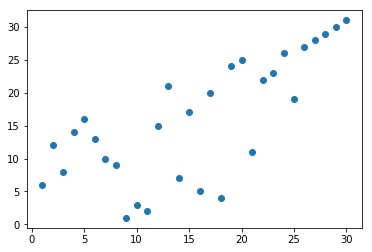

In [128]:
points = []
for k,v in results_and_standing_dict.items():
    for z,x in v.items():
        if z == '2011_results':
            if type(x) == dict:
                points.append((x['standings'], x['result_rank']))
points.sort()
x = []
y = []
for row in points:
    x.append(row[0])
    y.append(row[1])
plt.scatter(x,y)
plt.show()

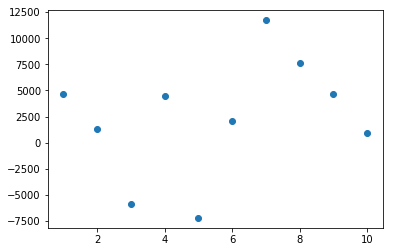

In [137]:
x = []
for k,v in results_and_standing_dict.items():
    if k == 'Washington Capitals':
        for z,y in v.items():
            x.append((y['result']))
y = [x for x in range(1,11)]
plt.scatter(y,x)
plt.show()

In [136]:
results_and_standing_dict

{'Anaheim Ducks': {'2010_results': {'result': -814.5425627529203,
   'standings': 17,
   'result_rank': 13},
  '2011_results': {'result': 10052.577409723002,
   'standings': 9,
   'result_rank': 1},
  '2012_results': {'result': -13566.477159102811,
   'standings': 26,
   'result_rank': 30},
  '2013_results': {'result': 11523.470924216925,
   'standings': 3,
   'result_rank': 2},
  '2014_results': {'result': 10682.31978270031,
   'standings': 2,
   'result_rank': 2},
  '2015_results': {'result': 8781.03037294419,
   'standings': 3,
   'result_rank': 5},
  '2016_results': {'result': -1014.9925328680544,
   'standings': 7,
   'result_rank': 15},
  '2017_results': {'result': 34.31773710792004,
   'standings': 6,
   'result_rank': 13},
  '2018_results': {'result': 561.2961317893623,
   'standings': 9,
   'result_rank': 12},
  '2019_results': {'result': -5514.454275980539,
   'standings': 24,
   'result_rank': 19}},
 'Arizona Coyotes': {'2010_results': {'result': 4683.164983164983,
   'stand